In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import (RandomUnderSampler, CondensedNearestNeighbour, TomekLinks, 
                                     OneSidedSelection, NeighbourhoodCleaningRule, RepeatedEditedNearestNeighbours)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report

from category_encoders.target_encoder import TargetEncoder

In [3]:
# data = pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv')
data = pd.read_csv('dataset/diabetes_012_health_indicators_BRFSS2015.csv')
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
data.shape

(253680, 22)

Data Description
HIGHBP - Have you EVER been told by a doctor, nurse or other health professional that you have high blood pressure? (1, 0)

HIGHCHOL - Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (1, 0)

CHOLCHECK - About how long has it been since you last had your blood cholesterol checked? (1, 0)

BMI (int)

SMOKER (1, 0)

STROKE (инсульт) - (Ever told) you had a stroke? (1, 0)

HEARTDISEASEORATTACK (1, 0)

PHYSACTIVITY - Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (1, 0)

FRUITS - Consume Fruit 1 or more times per day (1, 0)

VEGGIES - Consume Vegetables 1 or more times per day (1, 0)

HVYALCOHOLCONSUMP - Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) (1, 0)

ANYHEALTHCARE - Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (1, 0)

NODOCBCCOST - Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (1, 0)

GENHLTH - Would you say that in general your health is (1-Excellent, 2-Very good, 3-Good, 4-Fair, 5-Poor)

MENTHLTH - Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (int)

PHYSHLTH - Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (int)

DIFFWALK - Do you have serious difficulty walking or climbing stairs? (1, 0)

SEX - 1-Male, 2-Female (1-male)

AGE

1 Age 18 to 24

2 Age 25 to 29

3 Age 30 to 34

4 Age 35 to 39

5 Age 40 to 44

6 Age 45 to 49

7 Age 50 to 54

8 Age 55 to 59

9 Age 60 to 64

10 Age 65 to 69

11 Age 70 to 74

12 Age 75 to 79

13 Age 80 or older

EDUCATION
1 Never attended school or only kindergarten

2 Grades 1 through 8 (Elementary)

3 Grades 9 through 11 (Some high school)

4 Grade 12 or GED (High school graduate)

5 College 1 year to 3 years (Some college or technical school)

6 College 4 years or more (College graduate)

In [5]:
data.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [6]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [7]:
data = data.loc[~data.duplicated()]

<Axes: xlabel='Diabetes_012', ylabel='Count'>

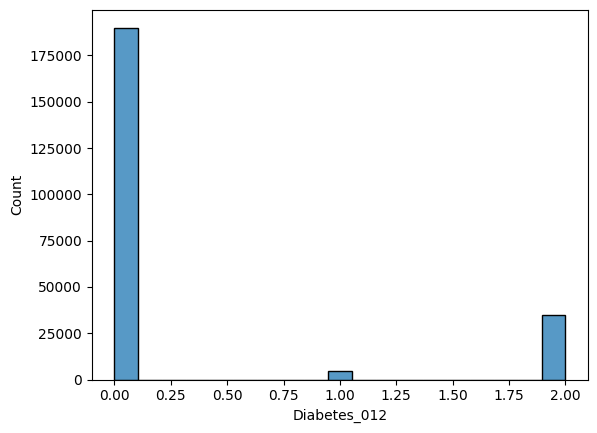

In [8]:
# Plot histogram
sns.histplot(data, x='Diabetes_012')

<Axes: >

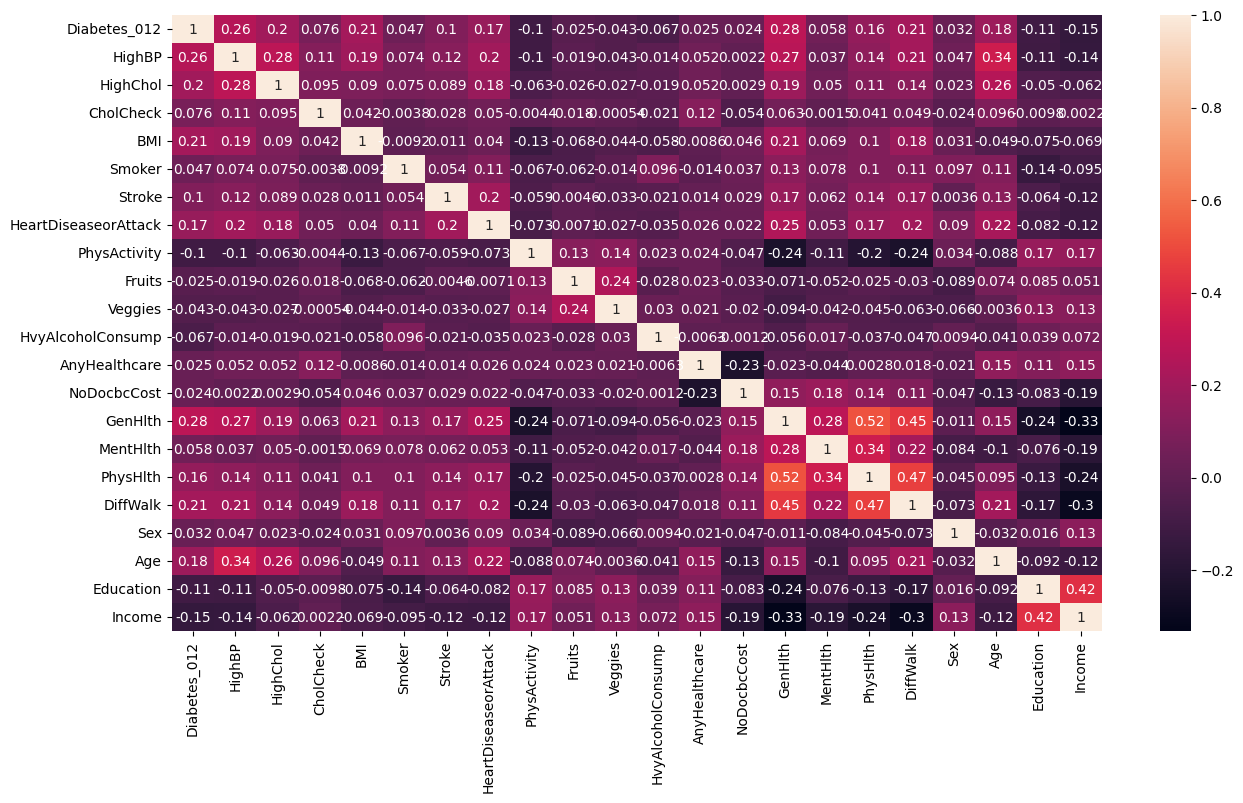

In [9]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True)

LogReg

In [10]:
# delete income too due to inapplicability for future predictions
X = data.drop(['Diabetes_012', 'Income'], axis=1)
y = data['Diabetes_012']


In [11]:
y.value_counts()

Diabetes_012
0.0    190055
2.0     35097
1.0      4629
Name: count, dtype: int64

In [12]:
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

In [13]:
y_rus.value_counts()

Diabetes_012
0.0    4629
1.0    4629
2.0    4629
Name: count, dtype: int64

In [14]:
tl = TomekLinks(sampling_strategy='auto', n_jobs=-1)
X_tl, y_tl = tl.fit_resample(X, y)

In [15]:
y_tl.value_counts()

Diabetes_012
0.0    182650
2.0     28284
1.0      4629
Name: count, dtype: int64

In [16]:
oss = OneSidedSelection(sampling_strategy='auto', random_state=42, n_jobs=-1)
X_oss, y_oss = oss.fit_resample(X, y)

In [17]:
y_oss.value_counts()

Diabetes_012
0.0    184196
2.0     29808
1.0      4629
Name: count, dtype: int64

In [18]:
ncr = NeighbourhoodCleaningRule(n_jobs=-1)
X_ncr, y_ncr = ncr.fit_resample(X, y)

In [19]:
y_ncr.value_counts()

Diabetes_012
0.0    168620
2.0      7921
1.0      4629
Name: count, dtype: int64

In [20]:
renn_all = RepeatedEditedNearestNeighbours(kind_sel='all', n_jobs=-1)
X_renn_all, y_renn_all = renn_all.fit_resample(X, y)

In [21]:
y_renn_all.value_counts()

Diabetes_012
0.0    129642
1.0      4629
2.0      1663
Name: count, dtype: int64

In [22]:
renn_mode = RepeatedEditedNearestNeighbours(kind_sel='mode', n_jobs=-1)
X_renn_mode, y_renn_mode = renn_mode.fit_resample(X, y)

In [23]:
y_renn_mode.value_counts()

Diabetes_012
0.0    176492
1.0      4629
2.0      3705
Name: count, dtype: int64

In [24]:
X_list = [X, X_rus, X_tl, X_oss, X_ncr, X_renn_all, X_renn_mode]
y_list = [y, y_rus, y_tl, y_oss, y_ncr, y_renn_all, y_renn_mode]
mthd_list = ['Initial', 'RandomUnderSampler', 'TomekLinks', 'OneSidedSelection', 'NeighbourhoodCleaningRule',
             'RepeatedEditedNearestNeighbours_all', 'RepeatedEditedNearestNeighbours_mode']

In [25]:
df_res = pd.DataFrame()
for i in range(len(X_list)):
    cv_dt = cross_val_score(DecisionTreeClassifier(), X_list[i], y_list[i], cv=3, scoring='f1')
    cv_rf = cross_val_score(RandomForestClassifier(), X_list[i], y_list[i], cv=3, scoring='f1')
    cv_lr = cross_val_score(LogisticRegression(), X_list[i], y_list[i], cv=3, scoring='f1')
    df_res = pd.concat([df_res, pd.DataFrame({'method':mthd_list[i], 
                                              'DecisionTreeClassifier':[cv_dt.mean()], 
                                              'RandomForestClassifier':[cv_rf.mean()], 
                                              'LogisticRegression':[cv_lr.mean()]})])
    
df_res

C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 137, in __call__
    score = scorer._score(
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py", line 1271, in f1_score
    return fbeta_score(
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\util

,method,DecisionTreeClassifier,RandomForestClassifier,LogisticRegression
0,Initial,NaN,NaN,NaN
0,RandomUnderSampler,NaN,NaN,NaN
0,TomekLinks,NaN,NaN,NaN
0,OneSidedSelection,NaN,NaN,NaN
0,NeighbourhoodCleaningRule,NaN,NaN,NaN
0,RepeatedEditedNearestNeighbours_all,NaN,NaN,NaN
0,RepeatedEditedNearestNeighbours_mode,NaN,NaN,NaN


In [26]:
df_res_w = pd.DataFrame()
for i in range(len(X_list)):
    cv_dt = cross_val_score(DecisionTreeClassifier(), X_list[i], y_list[i], cv=3, scoring='f1_weighted')
    cv_rf = cross_val_score(RandomForestClassifier(), X_list[i], y_list[i], cv=3, scoring='f1_weighted')
    cv_lr = cross_val_score(LogisticRegression(), X_list[i], y_list[i], cv=3, scoring='f1_weighted')
    df_res_w = pd.concat([df_res_w, pd.DataFrame({'method':mthd_list[i], 
                                              'DecisionTreeClassifier':[cv_dt.mean()], 
                                              'RandomForestClassifier':[cv_rf.mean()], 
                                              'LogisticRegression':[cv_lr.mean()]})])
    
df_res_w

C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

,method,DecisionTreeClassifier,RandomForestClassifier,LogisticRegression
0,Initial,0.750979,0.785370,0.784774
0,RandomUnderSampler,0.412256,0.479920,0.483763
0,TomekLinks,0.778203,0.811085,0.804267
0,OneSidedSelection,0.770715,0.804509,0.801425
0,NeighbourhoodCleaningRule,0.899557,0.921952,0.909770
0,RepeatedEditedNearestNeighbours_all,0.928274,0.940956,0.935164
0,RepeatedEditedNearestNeighbours_mode,0.930072,0.946060,0.938591


In [27]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_renn_all, y_renn_all, test_size=0.25, random_state=42)

In [28]:
sclr_cols = ['BMI']
te_cols = ['MentHlth', 'PhysHlth']
ohe_cols = X_train.drop(['MentHlth', 'PhysHlth', 'BMI'], axis=1).columns

In [29]:
te = TargetEncoder(cols=te_cols, smoothing=0.01)
te.fit(X_train[te_cols], y_train)
X_train_te = te.transform(X_train[te_cols])
X_test_te = te.transform(X_test[te_cols])

In [30]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', sparse_output=False), ohe_cols),
    ('scaling', StandardScaler(), sclr_cols)
])
column_transformer.fit(X_train)
X_train_ohe_scl = pd.DataFrame(column_transformer.transform(X_train), 
                              columns=column_transformer.get_feature_names_out())
X_test_ohe_scl = pd.DataFrame(column_transformer.transform(X_test), 
                             columns=column_transformer.get_feature_names_out())

In [31]:
X_train_prep = pd.concat([X_train_te.reset_index(drop=True), X_train_ohe_scl], axis=1)
X_test_prep = pd.concat([X_test_te.reset_index(drop=True), X_test_ohe_scl], axis=1)

In [32]:
X_train_prep.shape, X_test_prep.shape

((101950, 38), (33984, 38))

In [33]:
# (0.6786537574265642, RandomForestClassifier(max_depth=17, n_estimators=170, random_state=42))
params = {'max_depth':range(2, 20, 3), 'n_estimators':range(10, 200, 20)}
gs_rf = GridSearchCV(RandomForestClassifier(random_state = 42), params, cv=3, scoring='f1', verbose=2)
gs_rf.fit(X_train_prep, y_train)

gs_rf.best_score_, gs_rf.best_estimator_

Fitting 3 folds for each of 60 candidates, totalling 180 fits


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=2, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.1s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=2, n_estimators=10; total time=   0.1s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=2, n_estimators=30; total time=   0.3s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=2, n_estimators=30; total time=   0.3s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=2, n_estimators=30; total time=   0.3s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=2, n_estimators=50; total time=   0.5s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=2, n_estimators=50; total time=   0.5s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=2, n_estimators=50; total time=   0.5s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=2, n_estimators=70; total time=   0.7s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=2, n_estimators=70; total time=   0.7s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=2, n_estimators=70; total time=   0.7s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=2, n_estimators=90; total time=   0.9s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=2, n_estimators=90; total time=   0.9s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=2, n_estimators=90; total time=   0.9s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=2, n_estimators=110; total time=   1.1s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=2, n_estimators=110; total time=   1.1s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=2, n_estimators=110; total time=   1.1s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=2, n_estimators=130; total time=   1.3s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=2, n_estimators=130; total time=   1.3s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=2, n_estimators=130; total time=   1.3s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=2, n_estimators=150; total time=   1.5s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=2, n_estimators=150; total time=   1.5s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=2, n_estimators=150; total time=   1.5s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=2, n_estimators=170; total time=   1.7s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=2, n_estimators=170; total time=   1.7s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=2, n_estimators=170; total time=   1.7s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=2, n_estimators=190; total time=   2.0s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=2, n_estimators=190; total time=   1.9s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=2, n_estimators=190; total time=   1.9s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=5, n_estimators=10; total time=   0.1s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=5, n_estimators=10; total time=   0.1s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=5, n_estimators=10; total time=   0.1s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=5, n_estimators=30; total time=   0.5s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=5, n_estimators=30; total time=   0.5s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=5, n_estimators=30; total time=   0.5s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=5, n_estimators=50; total time=   0.8s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=5, n_estimators=50; total time=   0.8s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=5, n_estimators=50; total time=   0.8s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=5, n_estimators=70; total time=   1.2s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=5, n_estimators=70; total time=   1.2s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=5, n_estimators=70; total time=   1.2s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=5, n_estimators=90; total time=   1.6s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=5, n_estimators=90; total time=   1.6s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=5, n_estimators=90; total time=   1.6s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=5, n_estimators=110; total time=   1.9s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=5, n_estimators=110; total time=   1.9s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=5, n_estimators=110; total time=   1.9s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=5, n_estimators=130; total time=   2.5s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=5, n_estimators=130; total time=   2.3s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=5, n_estimators=130; total time=   2.3s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=5, n_estimators=150; total time=   2.6s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=5, n_estimators=150; total time=   2.6s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=5, n_estimators=150; total time=   2.6s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=5, n_estimators=170; total time=   3.0s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=5, n_estimators=170; total time=   3.0s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=5, n_estimators=170; total time=   3.0s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=5, n_estimators=190; total time=   3.3s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=5, n_estimators=190; total time=   3.4s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=5, n_estimators=190; total time=   3.3s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=8, n_estimators=10; total time=   0.2s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=8, n_estimators=10; total time=   0.3s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=8, n_estimators=10; total time=   0.2s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=8, n_estimators=30; total time=   0.7s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=8, n_estimators=30; total time=   0.7s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=8, n_estimators=30; total time=   0.7s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=8, n_estimators=50; total time=   1.2s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=8, n_estimators=50; total time=   1.2s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=8, n_estimators=50; total time=   1.2s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=8, n_estimators=70; total time=   1.8s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=8, n_estimators=70; total time=   1.8s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=8, n_estimators=70; total time=   1.8s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=8, n_estimators=90; total time=   2.3s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=8, n_estimators=90; total time=   2.3s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .......................max_depth=8, n_estimators=90; total time=   2.3s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=8, n_estimators=110; total time=   2.8s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=8, n_estimators=110; total time=   2.9s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=8, n_estimators=110; total time=   3.0s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=8, n_estimators=130; total time=   3.3s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=8, n_estimators=130; total time=   3.3s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=8, n_estimators=130; total time=   3.3s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=8, n_estimators=150; total time=   3.8s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=8, n_estimators=150; total time=   4.0s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=8, n_estimators=150; total time=   3.9s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=8, n_estimators=170; total time=   4.4s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=8, n_estimators=170; total time=   4.3s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=8, n_estimators=170; total time=   4.4s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=8, n_estimators=190; total time=   4.9s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=8, n_estimators=190; total time=   4.8s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=8, n_estimators=190; total time=   4.9s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=11, n_estimators=10; total time=   0.3s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=11, n_estimators=10; total time=   0.3s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=11, n_estimators=10; total time=   0.3s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=11, n_estimators=30; total time=   1.0s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=11, n_estimators=30; total time=   1.0s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=11, n_estimators=30; total time=   1.0s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=11, n_estimators=50; total time=   1.7s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=11, n_estimators=50; total time=   1.7s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=11, n_estimators=50; total time=   1.7s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=11, n_estimators=70; total time=   2.4s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=11, n_estimators=70; total time=   2.4s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=11, n_estimators=70; total time=   2.4s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=11, n_estimators=90; total time=   3.0s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=11, n_estimators=90; total time=   3.1s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=11, n_estimators=90; total time=   3.0s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=11, n_estimators=110; total time=   3.7s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=11, n_estimators=110; total time=   3.8s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=11, n_estimators=110; total time=   3.8s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=11, n_estimators=130; total time=   4.4s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=11, n_estimators=130; total time=   4.5s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=11, n_estimators=130; total time=   4.4s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=11, n_estimators=150; total time=   5.1s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=11, n_estimators=150; total time=   5.1s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=11, n_estimators=150; total time=   5.1s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=11, n_estimators=170; total time=   5.9s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=11, n_estimators=170; total time=   5.8s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=11, n_estimators=170; total time=   5.8s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=11, n_estimators=190; total time=   6.7s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=11, n_estimators=190; total time=   7.0s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=11, n_estimators=190; total time=   6.9s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=14, n_estimators=10; total time=   0.4s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=14, n_estimators=10; total time=   0.4s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=14, n_estimators=10; total time=   0.4s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=14, n_estimators=30; total time=   1.3s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=14, n_estimators=30; total time=   1.4s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=14, n_estimators=30; total time=   1.5s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=14, n_estimators=50; total time=   2.3s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=14, n_estimators=50; total time=   2.3s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=14, n_estimators=50; total time=   2.2s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=14, n_estimators=70; total time=   3.0s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=14, n_estimators=70; total time=   3.1s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=14, n_estimators=70; total time=   3.8s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=14, n_estimators=90; total time=   4.1s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=14, n_estimators=90; total time=   4.4s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=14, n_estimators=90; total time=   4.6s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=14, n_estimators=110; total time=   5.1s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=14, n_estimators=110; total time=   4.9s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=14, n_estimators=110; total time=   4.7s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=14, n_estimators=130; total time=   5.6s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=14, n_estimators=130; total time=   5.9s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=14, n_estimators=130; total time=   5.7s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=14, n_estimators=150; total time=   6.3s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=14, n_estimators=150; total time=   6.4s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=14, n_estimators=150; total time=   6.4s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=14, n_estimators=170; total time=   7.2s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=14, n_estimators=170; total time=   7.2s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=14, n_estimators=170; total time=   7.3s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=14, n_estimators=190; total time=   8.0s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=14, n_estimators=190; total time=   8.1s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=14, n_estimators=190; total time=   8.0s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=17, n_estimators=10; total time=   0.4s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=17, n_estimators=10; total time=   0.4s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=17, n_estimators=10; total time=   0.4s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=17, n_estimators=30; total time=   1.4s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=17, n_estimators=30; total time=   1.4s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=17, n_estimators=30; total time=   1.5s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=17, n_estimators=50; total time=   2.4s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=17, n_estimators=50; total time=   2.5s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=17, n_estimators=50; total time=   2.5s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=17, n_estimators=70; total time=   3.4s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=17, n_estimators=70; total time=   3.5s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=17, n_estimators=70; total time=   3.4s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=17, n_estimators=90; total time=   4.4s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=17, n_estimators=90; total time=   4.4s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END ......................max_depth=17, n_estimators=90; total time=   4.4s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=17, n_estimators=110; total time=   5.4s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=17, n_estimators=110; total time=   5.4s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=17, n_estimators=110; total time=   5.4s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=17, n_estimators=130; total time=   6.3s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=17, n_estimators=130; total time=   6.3s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=17, n_estimators=130; total time=   6.5s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=17, n_estimators=150; total time=   7.2s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=17, n_estimators=150; total time=   7.4s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=17, n_estimators=150; total time=   7.4s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=17, n_estimators=170; total time=   8.3s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=17, n_estimators=170; total time=   8.3s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=17, n_estimators=170; total time=   8.2s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=17, n_estimators=190; total time=   9.0s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

[CV] END .....................max_depth=17, n_estimators=190; total time=   9.1s
[CV] END .....................max_depth=17, n_estimators=190; total time=   9.0s


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*a

(nan, RandomForestClassifier(max_depth=2, n_estimators=10, random_state=42))

In [34]:
params = {'max_depth':range(2, 20, 3), 'n_estimators':range(10, 200, 20)}
gs_rf_w = GridSearchCV(RandomForestClassifier(random_state = 42), params, cv=3, scoring='f1_weighted', verbose=2)
gs_rf_w.fit(X_train_prep, y_train)

gs_rf_w.best_score_, gs_rf_w.best_estimator_

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=30; total time=   0.3s
[CV] END .......................max_depth=2, n_estimators=30; total time=   0.2s
[CV] END .......................max_depth=2, n_estimators=30; total time=   0.2s
[CV] END .......................max_depth=2, n_estimators=50; total time=   0.5s
[CV] END .......................max_depth=2, n_estimators=50; total time=   0.5s
[CV] END .......................max_depth=2, n_estimators=50; total time=   0.4s
[CV] END .......................max_depth=2, n_estimators=70; total time=   0.6s
[CV] END .......................max_depth=2, n_estimators=70; total time=   0.7s
[CV] END .......................max_depth=2, n_

(0.9397293712717403,
 RandomForestClassifier(max_depth=17, n_estimators=10, random_state=42))

In [35]:
gs_rf.best_estimator_.fit(X_train_prep, y_train)

pred_rf = gs_rf.best_estimator_.predict(X_test_prep)

In [37]:
f1_score(y_test, pred_rf, average='weighted')

0.9303802732782099

In [47]:
f1_score(y_test, pred_rf, average='micro')

0.9532132768361582

In [48]:
np.array([0, 0, 0, 34.2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 15, 0, 0, 1, 2, 6]).reshape(-1, 1)

array([[ 0. ],
       [ 0. ],
       [ 0. ],
       [34.2],
       [ 1. ],
       [ 0. ],
       [ 0. ],
       [ 0. ],
       [ 0. ],
       [ 0. ],
       [ 0. ],
       [ 1. ],
       [ 0. ],
       [ 2. ],
       [15. ],
       [ 0. ],
       [ 0. ],
       [ 1. ],
       [ 2. ],
       [ 6. ]])

In [49]:
X_my = pd.DataFrame([[0, 0, 0, 34.2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 15, 0, 0, 1, 2, 6]], columns=X_test.columns)
X_my_te = te.transform(X_my[te_cols])

X_my_ohe_scl = pd.DataFrame(column_transformer.transform(X_my), 
                              columns=column_transformer.get_feature_names_out())

X_my_prep = pd.concat([X_my_te.reset_index(drop=True), X_my_ohe_scl], axis=1)

X_my_prep

,MentHlth,PhysHlth,ohe__HighBP_1.0,ohe__HighChol_1.0,ohe__CholCheck_1.0,ohe__Smoker_1.0,ohe__Stroke_1.0,ohe__HeartDiseaseorAttack_1.0,ohe__PhysActivity_1.0,ohe__Fruits_1.0,ohe__Veggies_1.0,ohe__HvyAlcoholConsump_1.0,ohe__AnyHealthcare_1.0,ohe__NoDocbcCost_1.0,ohe__GenHlth_2.0,ohe__GenHlth_3.0,ohe__GenHlth_4.0,ohe__GenHlth_5.0,ohe__DiffWalk_1.0,ohe__Sex_1.0,ohe__Age_2.0,ohe__Age_3.0,ohe__Age_4.0,ohe__Age_5.0,ohe__Age_6.0,ohe__Age_7.0,ohe__Age_8.0,ohe__Age_9.0,ohe__Age_10.0,ohe__Age_11.0,ohe__Age_12.0,ohe__Age_13.0,ohe__Education_2.0,ohe__Education_3.0,ohe__Education_4.0,ohe__Education_5.0,ohe__Education_6.0,scaling__BMI
0,0.081568,0.037856,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.141693


In [50]:
gs_rf.best_estimator_.predict(X_my_prep)

array([0.])